In [41]:
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [4]:
test_df = pd.read_csv('datasets/titanic/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df = pd.read_csv('datasets/titanic/gendermodel.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
df = df.merge(test_df, on=['PassengerId'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
# get data types for each column
datadict = pd.DataFrame(df.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [35]:
# check for missing values
datadict['MissingValues'] = df.isnull().sum()
datadict

,0,MissingValues
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,86
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,1


In [53]:
datadict['NUnique'] = df.nunique()
datadict

,0,MissingValues,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,86,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,1,248


In [50]:
print("\nColumns with missing value and counts")
print("{0:12} \t{1} \t{2}".format('', 'Null', 'Not Null'))
for column in df :
    if df[column].isnull().any() :
        print("{0:12} \t{1} \t{2}"
              .format(column, df[column].isnull().sum(), 
                      df.shape[0] - df[column].isnull().sum()))


Columns with missing value and counts
             	Null 	Not Null
Age          	177 	714
Cabin        	687 	204
Embarked     	2 	889


In [9]:
df.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

In [32]:
survived = df.pivot_table('Survived', index='PassengerId', columns='Sex', aggfunc=sum)
survived

Sex,female,male
PassengerId,,
892,NaN,0.0
893,1.0,NaN
894,NaN,0.0
895,NaN,0.0
896,1.0,NaN
...,...,...
1305,NaN,0.0
1306,1.0,NaN
1307,NaN,0.0


In [30]:
male = df[df.Sex == 'male']
ms = male[male.Survived == 1]
len(ms)

0

In [36]:
female = df[df.Sex == 'female']
fs = female[female.Survived == 1]
len(fs)

152

In [37]:
df = pd.read_csv('datasets/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
male = df[df.Sex == 'male']
ms = male[male.Survived == 1]
len(ms)

109

In [39]:
female = df[df.Sex == 'female']
fs = female[female.Survived == 1]
len(fs)

233

In [40]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Male')

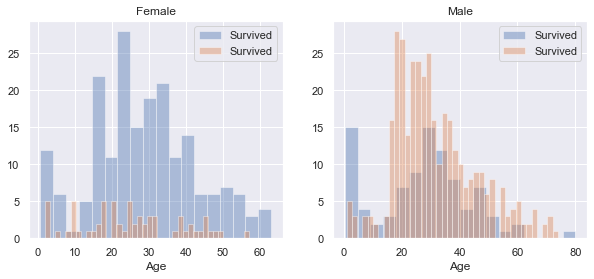

In [61]:
survived = 'Survived'
not_survived = 'Not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, 
                  label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, 
                  label=survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, 
                  label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, 
                  label=survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

In [48]:
print("\nColumns with missing value and counts")
print("{0:12} \t{1} \t{2}".format('', 'Null', 'Not Null'))
for column in df :
    if df[column].isnull().any() :
        print("{0:12} \t{1} \t{2}"
              .format(column, df[column].isnull().sum(), 
                      df.shape[0] - df[column].isnull().sum()))


Columns with missing value and counts
             	Null 	Not Null
Age          	177 	714
Cabin        	687 	204
Embarked     	2 	889


In [52]:
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


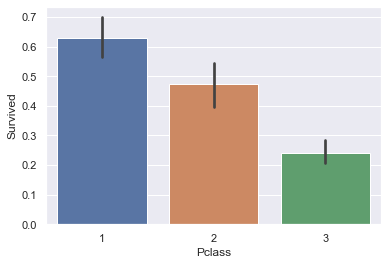

In [54]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [57]:
def add_annotation(splot) :
    # to add annotation
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 10), 
                       textcoords = 'offset points')

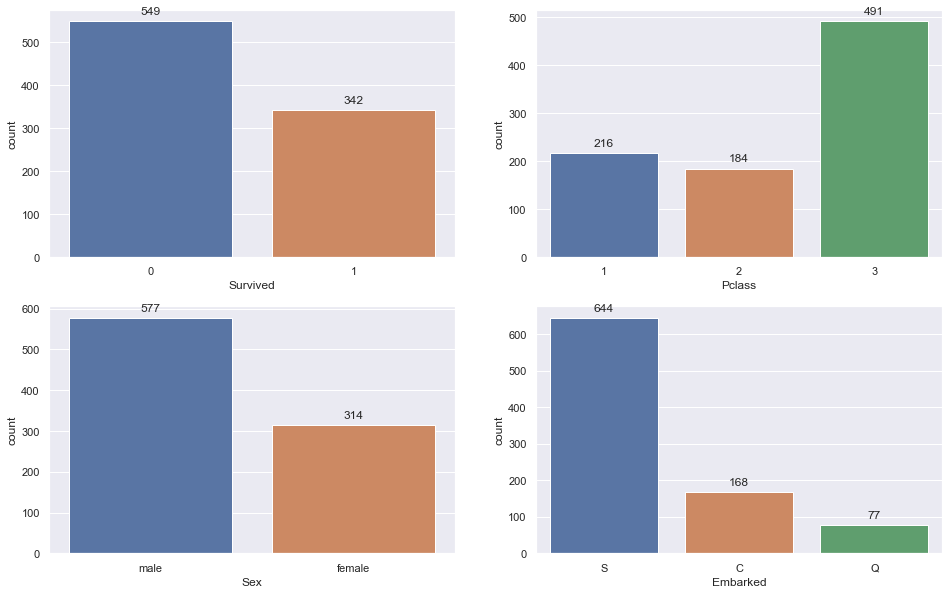

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
splot = sns.countplot('Survived', data=df, ax=axes[0,0])
add_annotation(splot)
splot = sns.countplot('Pclass', data=df, ax=axes[0,1])
add_annotation(splot)
splot = sns.countplot('Sex', data=df, ax=axes[1,0])
add_annotation(splot)
splot = sns.countplot('Embarked', data=df, ax=axes[1,1])
add_annotation(splot)